# Feature Extraction

In this notebook, we will extract some features from the EEG signals

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("..")

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

df = pd.read_csv("output/output.csv")



In [3]:
index = 12

instance = df.iloc[index]

In [4]:

arr = np.load(instance.array_path)
arr.shape

(15, 104)

In [5]:
t = np.arange(-0.11, 0.7, 1.0/128.0)

len(t)

104

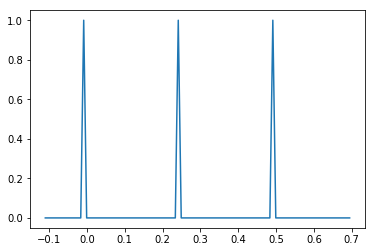

In [6]:
plt.plot(t, arr[14, :])


In [7]:
from scipy import signal

In [8]:
help(signal.welch)

Help on function welch in module scipy.signal.spectral:

welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
    Estimate power spectral density using Welch's method.
    
    Welch's method [1]_ computes an estimate of the power spectral
    density by dividing the data into overlapping segments, computing a
    modified periodogram for each segment and averaging the
    periodograms.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. See `get_window` for a list of windows
        and required parameters. If `window` is array_like it will be
        used directly as the window and its length must be nperseg.
        Defaults to a Hann window.
    nperseg : int, optional
        Len

In [9]:
freqs, amplitudes = signal.welch(arr[1, :], fs=128, nperseg=65)


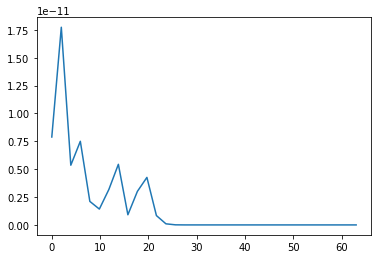

In [10]:
plt.plot(freqs, amplitudes)

Perfecto, las magnitudes arriba de 20 son nulas.

# Using our feature extractors


In [11]:
import p300.feature_extraction

In [12]:
extractor = p300.feature_extraction.FrequencyExtractor()

In [13]:
ret = extractor.transform(arr)

In [14]:
ret.shape

(15, 33)

Ploteo todos menos el último canal que la caga..

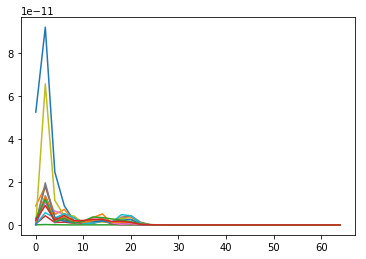

In [15]:
for i in range(14):
    plt.plot(extractor.freqs, ret[i, :])

# How should it be in the script

In [28]:
df = pd.read_csv("output/output.csv")

df = df.iloc[:20]

df.columns

Index(['id', 'array_path', 'ch_names', 'event_time', 'event_type', 'index',
       'sfreq', 'subject_id'],
      dtype='object')

In [ ]:
# %load p300/feature_extraction/preprocessing.py
"""Preprocessing of data."""
import numpy as np
from . import BaseTransformer


class LoadArray(BaseTransformer):
    """Load numpy array transformer."""

    def __init__(self, remove_sti=True):
        """Constructor.

        Parameters
        ----------

        remove_sti: Boolean (default true)
            Indicates whether to remove the Stimulus channel
        """
        self.remove_sti = remove_sti

    def transform(self, x, y=None):
        """Transform method."""
        ret = np.array([np.load(path) for path in x])

        if self.remove_sti:
            # TODO: Remove this hardcoded stuff
            ret = ret[:, :14, :]

        return ret


In [59]:

transformer = LoadArray()

In [67]:
signals = transformer.transform(df.array_path)

print(signals.shape)

(20, 14, 104)


In [68]:
t = np.arange(-0.10, 0.7, 0.8/104)

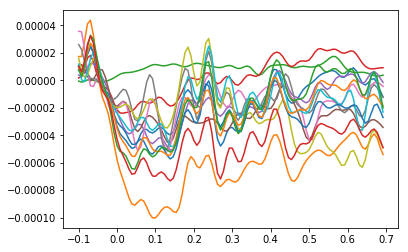

In [73]:
for r in signals[1, :, :]:
    plt.plot(t, r)